In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [2]:
dataset_dir = "D:\Deep_Learning_code\LP-IV-datasets\Object Detection(Ass6)\caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale=1.0/255)

dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=2000,
    class_mode='categorical'
    
)

Found 9144 images belonging to 102 classes.


In [3]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

In [5]:
weights_path = r"D:\Deep_Learning_code\LP-IV-datasets\Object Detection(Ass6)\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights= weights_path, include_top=False, input_shape=(64,64,3))

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = Flatten()(base_model.output)
x = Dense(64, activation = 'relu')(x)
predictions  = Dense(102, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [10]:
model.fit(x_train, y_train, batch_size= 64, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 92s 3s/step - loss: 3.9545 - accuracy: 0.1935 - val_loss: 3.4310 - val_accuracy: 0.3070
Epoch 2/10
32/32 [==============================] - 87s 3s/step - loss: 2.9833 - accuracy: 0.3770 - val_loss: 2.9316 - val_accuracy: 0.4065
Epoch 3/10
32/32 [==============================] - 54s 2s/step - loss: 2.4504 - accuracy: 0.4875 - val_loss: 2.5946 - val_accuracy: 0.4540
Epoch 4/10
32/32 [==============================] - 51s 2s/step - loss: 2.0306 - accuracy: 0.5540 - val_loss: 2.3800 - val_accuracy: 0.4835
Epoch 5/10
32/32 [==============================] - 49s 2s/step - loss: 1.7220 - accuracy: 0.6205 - val_loss: 2.2410 - val_accuracy: 0.4955
Epoch 6/10
32/32 [==============================] - 52s 2s/step - loss: 1.4916 - accuracy: 0.6680 - val_loss: 2.1119 - val_accuracy: 0.5200
Epoch 7/10
32/32 [==============================] - 51s 2s/step - loss: 1.2938 - accuracy: 0.7200 - val_loss: 2.0570 - val_accuracy: 0.5225
Epoch 8/10
32/32 [==

In [12]:
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
x = Flatten()(base_model.output)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(102, activation = 'softmax')(x)

model = Model(inputs= base_model.input, outputs = predictions)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
16/16 [==============================] - 45s 3s/step - loss: 3.2229 - accuracy: 0.3265 - val_loss: 2.4236 - val_accuracy: 0.4655
Epoch 2/10
16/16 [==============================] - 49s 3s/step - loss: 1.7227 - accuracy: 0.5865 - val_loss: 1.9127 - val_accuracy: 0.5470
Epoch 3/10
16/16 [==============================] - 52s 3s/step - loss: 0.9842 - accuracy: 0.7465 - val_loss: 1.7225 - val_accuracy: 0.5935
Epoch 4/10
16/16 [==============================] - 51s 3s/step - loss: 0.6130 - accuracy: 0.8290 - val_loss: 1.6034 - val_accuracy: 0.6280
Epoch 5/10
16/16 [==============================] - 51s 3s/step - loss: 0.3133 - accuracy: 0.9230 - val_loss: 1.6403 - val_accuracy: 0.6305
Epoch 6/10
16/16 [==============================] - 51s 3s/step - loss: 0.1688 - accuracy: 0.9600 - val_loss: 1.7009 - val_accuracy: 0.6385
Epoch 7/10
16/16 [==============================] - 51s 3s/step - loss: 0.0985 - accuracy: 0.9825 - val_loss: 1.7766 - val_accuracy: 0.6175
Epoch 8/10
16/16 [==

In [16]:
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())

Preditcted:  cup
Actual:  stapler


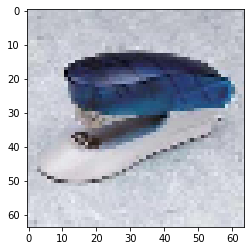

In [18]:
n = 991

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])